In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
# Defines the places and the distances between them in a distance matrix
places = ["Dorado Park", "Khomasdal", "Katutura", "Eros", "Klein Windhoek"]
distances = np.array([
    [0, 7, 20, 15, 12],
    [10, 0, 6, 14, 18],
    [20, 6, 0, 15, 30],
    [15, 14, 25, 0, 2],
    [12, 18, 30, 2, 0]
])

In [3]:
# Function to calculate the total distance of a given route
def calculate_total_distance(route, distance_matrix):
    total_distance = 0
    num_places = len(route)
    for i in range(num_places - 1):
        total_distance += distance_matrix[route[i]][route[i+1]]
    # Return to the starting point
    total_distance += distance_matrix[route[-1]][route[0]]
    return total_distance

In [4]:
# Hill climbing algorithm to find a solution to the TSP
def hill_climb(initial_route, distance_matrix, num_iterations):
    current_route = initial_route[:]
    best_route = initial_route[:]
    best_distance = calculate_total_distance(initial_route, distance_matrix)
    
    for _ in range(num_iterations):
        # Generate a new candidate route by swapping two cities
        new_route = current_route[:]
        i, j = random.sample(range(len(new_route)), 2)
        new_route[i], new_route[j] = new_route[j], new_route[i]
        
        # Calculate the new distance
        new_distance = calculate_total_distance(new_route, distance_matrix)
        
        # If the new route is better, accept it as the current route
        if new_distance < best_distance:
            best_route = new_route[:]
            best_distance = new_distance
            current_route = new_route[:]
    
    return best_route, best_distance


In [5]:
# Define hypothetical coordinates for plotting
place_coordinates = {
    "Dorado Park": (3, 2),
    "Khomasdal": (1, 5),
    "Katutura": (4, 7),
    "Eros": (7, 5),
    "Klein Windhoek": (6, 1)
}

In [6]:
# Function to plot the route
def plot_route(route, place_coordinates):
    fig, ax = plt.subplots()
    x = [place_coordinates[places[i]][0] for i in route] + [place_coordinates[places[route[0]]][0]]
    y = [place_coordinates[places[i]][1] for i in route] + [place_coordinates[places[route[0]]][1]]
    
    ax.plot(x, y, marker='o', linestyle='-')
    ax.scatter(x, y)
    for i, place in enumerate(route):
        ax.annotate(places[place], (x[i], y[i]))
    plt.title('Traveling Salesman Route')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# Initial random route
random_route = list(range(len(places)))
random.shuffle(random_route)

# Perform hill climbing
best_route, best_distance = hill_climb(random_route, distances, 10000)

In [7]:
# Display the best route and its distance
best_route_names = [places[i] for i in best_route]
print("Best route found:", best_route_names)
print("Total distance:", best_distance, "km")

Best route found: ['Klein Windhoek', 'Dorado Park', 'Khomasdal', 'Katutura', 'Eros']
Total distance: 42 km


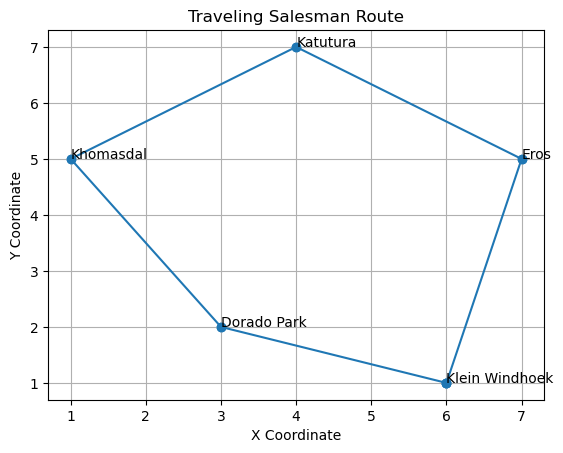

In [8]:
# Plot the best route
plot_route(best_route, place_coordinates)